In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("mobile_prices_2023.csv")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [3]:
df.shape

(1836, 11)

In [4]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [5]:
categorical_data= df.select_dtypes(include=["object","category"])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0], inplace=True)
df.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [6]:
df["Price in INR"]= df["Price in INR"].str.replace(",","")
df["Price in INR"]= df["Price in INR"].str.replace("₹","")
df["Number of Ratings"]= df["Number of Ratings"].str.replace(",","")
df["Price in INR"]= pd.to_numeric(df["Price in INR"])
df["Number of Ratings"]=pd.to_numeric(df["Number of Ratings"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   int64  
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1836 non-null   object 
 5   Back/Rare Camera   1836 non-null   object 
 6   Front Camera       1836 non-null   object 
 7   Battery            1836 non-null   object 
 8   Processor          1836 non-null   object 
 9   Price in INR       1836 non-null   int64  
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 157.9+ KB


In [7]:
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17


In [8]:
encoder= LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,746,4.2,33561,16,14,171,26,78,187,5649,0
1,789,4.2,77128,25,20,118,32,78,173,11999,0
2,748,4.3,15175,25,20,172,26,78,106,6999,0
3,750,4.2,22621,25,20,137,26,78,193,7749,0
4,747,4.3,15175,25,20,172,26,78,106,6999,0


In [9]:
X=df.drop(["Price in INR"],axis=1)
y=df["Price in INR"]

In [10]:
X.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Date of Scraping
0,746,4.2,33561,16,14,171,26,78,187,0
1,789,4.2,77128,25,20,118,32,78,173,0
2,748,4.3,15175,25,20,172,26,78,106,0
3,750,4.2,22621,25,20,137,26,78,193,0
4,747,4.3,15175,25,20,172,26,78,106,0


In [11]:
y.head()

0     5649
1    11999
2     6999
3     7749
4     6999
Name: Price in INR, dtype: int64

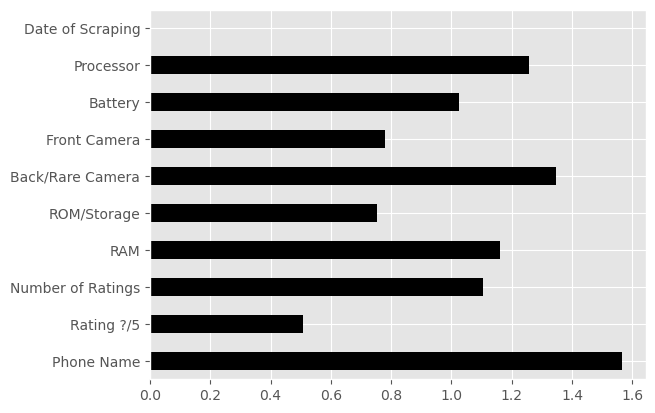

In [12]:
plt.style.use("ggplot")
importance= mutual_info_regression(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="black")
plt.show()

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y, test_size=0.2,random_state=1)

In [14]:
tree=DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [15]:
pred1=tree.predict(xtest)
pred1

array([ 20999.        ,   1617.5       ,  16499.        ,  15990.        ,
        16999.        ,   6999.        ,  10499.        ,  11999.        ,
         8999.        ,  25999.        ,  36990.        ,  27990.        ,
        15499.        ,   9999.        ,  24990.        ,  16999.        ,
        14999.        ,  36999.        ,  25999.        ,  32299.        ,
        31999.        ,   7199.        ,  69999.        ,  13999.        ,
         1749.        ,  11999.        ,  80999.        ,  44999.        ,
        48990.        ,  27999.        ,   9499.        ,   3440.        ,
        42999.        , 100999.        ,   5999.        ,  12999.        ,
        17499.        ,  27999.        ,   6969.        ,  13999.        ,
        71999.        ,  13499.        ,   8799.        ,  15499.        ,
         9490.        ,  23999.        ,  13999.        ,   1899.        ,
        14990.        ,  22800.        ,  13999.        ,  13999.        ,
        32990.        ,  

In [16]:
print("MAE",mean_absolute_error(ytest,pred1))
print("MAPE",mean_absolute_percentage_error(ytest,pred1))
print("MSE",mean_squared_error(ytest,pred1))
print("R2 SCORE",r2_score(ytest,pred1))

MAE 1921.596920289855
MAPE 0.23662448828649235
MSE 42376242.8857186
R2 SCORE 0.9146573621087764


In [17]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred1

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
556,20999,20999.0
1386,1250,1617.5
1450,16499,16499.0
111,14999,15990.0
1787,15999,16999.0
...,...,...
790,13999,12988.0
846,10990,10990.0
654,13499,13499.0
1084,36600,46990.0


<Axes: xlabel='Price in INR'>

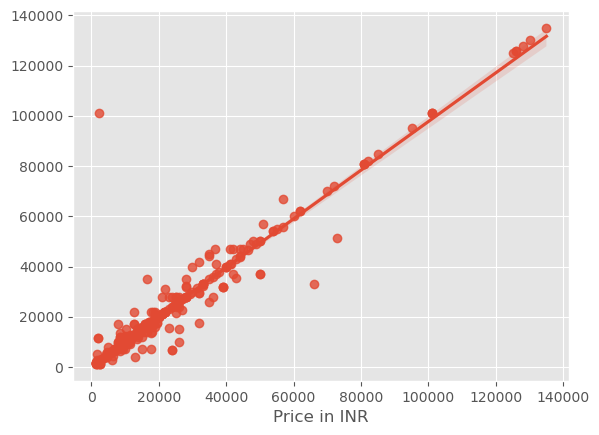

In [18]:
sns.regplot(x= ytest,y=pred1)

In [19]:
LinearModel=Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())])
LinearModel.fit(xtrain,ytrain)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', LinearRegression())])

In [20]:
pred2=LinearModel.predict(xtest)
pred2

array([ 3.09322168e+04,  3.72279975e+04,  3.32348742e+04,  1.76005273e+04,
        3.86593758e+04,  9.39553665e+03,  1.99560569e+04,  2.21384330e+04,
        2.11334887e+03,  2.20479428e+04,  2.44293145e+04,  3.08396963e+04,
        1.14675239e+04,  1.42061333e+04, -6.04110322e+03,  3.99319337e+04,
        2.57262453e+04,  3.16468414e+04,  1.77122623e+04,  3.25989433e+04,
        1.65748486e+04,  1.63697139e+04,  7.09390271e+04,  1.11860620e+04,
        1.22305552e+04,  2.54575864e+04,  6.62853153e+04,  1.87194383e+04,
        9.77064990e+03,  2.62201423e+04,  1.98641986e+04,  4.55823547e+04,
        3.19349640e+03,  6.06564818e+04, -2.50477349e+02,  5.34226039e+02,
        2.85090685e+04,  9.50617644e+03,  3.45372101e+03,  1.11674189e+04,
        6.56442650e+04,  2.30862971e+04,  7.83518183e+03,  1.14582023e+04,
        1.72451155e+04,  3.09028450e+04,  1.12151032e+04,  3.43582366e+04,
        3.40345324e+04,  1.72663052e+04,  3.58553318e+04,  7.68046185e+03,
        1.67993461e+04,  

In [21]:
print("MAE",mean_absolute_error(ytest,pred2))
print("MAPE",mean_absolute_percentage_error(ytest,pred2))
print("MSE",mean_squared_error(ytest,pred2))
print("R2 SCORE",r2_score(ytest,pred2))

MAE 13737.99219635259
MAPE 1.6216722035676847
MSE 362139163.78688395
R2 SCORE 0.270678346717936


In [22]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred2

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
556,20999,30932.216810
1386,1250,37227.997455
1450,16499,33234.874226
111,14999,17600.527312
1787,15999,38659.375837
...,...,...
790,13999,12318.398017
846,10990,10719.659721
654,13499,24256.319003
1084,36600,21244.687460


<Axes: xlabel='Price in INR'>

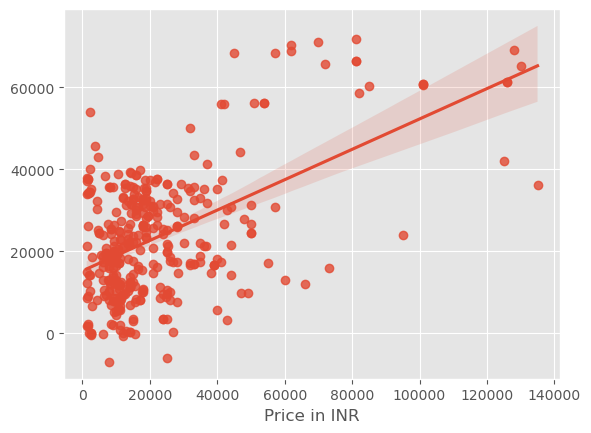

In [23]:
sns.regplot(x= ytest,y=pred2)

In [24]:
forest=RandomForestRegressor()
forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [25]:
pred3=forest.predict(xtest)
pred3

array([ 21457.5       ,   2103.55321429,  17273.82      ,  15909.77      ,
        16256.27      ,   7037.67      ,  10117.25      ,  12093.6       ,
         8966.74      ,  27684.85      ,  55808.6       ,  28759.1       ,
        15058.73      ,   9924.26      ,  28393.25      ,  16584.89      ,
        14448.14      ,  49937.24      ,  26013.53      ,  35899.39333333,
        28675.38666667,   7110.25      ,  70529.        ,  13988.        ,
         1875.5725    ,  10472.32      ,  81549.        ,  44865.5425    ,
        43766.68      ,  27841.975     ,   9239.23      ,  14080.40583333,
        30729.5       ,  99459.        ,   6802.6       ,  13026.58666667,
        19211.19      ,  28418.13      ,  20187.85      ,  13947.        ,
        71099.        ,  13686.5       ,   9517.25      ,  15103.73      ,
        10675.77      ,  25976.64      ,  12377.15      ,   2057.57      ,
        15285.54      ,  22998.27      ,  14393.44      ,  13494.94      ,
        30705.54      ,  

In [26]:
print("MAE",mean_absolute_error(ytest,pred3))
print("MAPE",mean_absolute_percentage_error(ytest,pred3))
print("MSE",mean_squared_error(ytest,pred3))
print("R2 SCORE",r2_score(ytest,pred3))

MAE 2475.963133863872
MAPE 0.2842504088756001
MSE 36397794.35699987
R2 SCORE 0.9266975179412253


In [27]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred3

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
556,20999,21457.500000
1386,1250,2103.553214
1450,16499,17273.820000
111,14999,15909.770000
1787,15999,16256.270000
...,...,...
790,13999,11451.840000
846,10990,11018.840000
654,13499,13513.960000
1084,36600,46732.710000


<Axes: xlabel='Price in INR'>

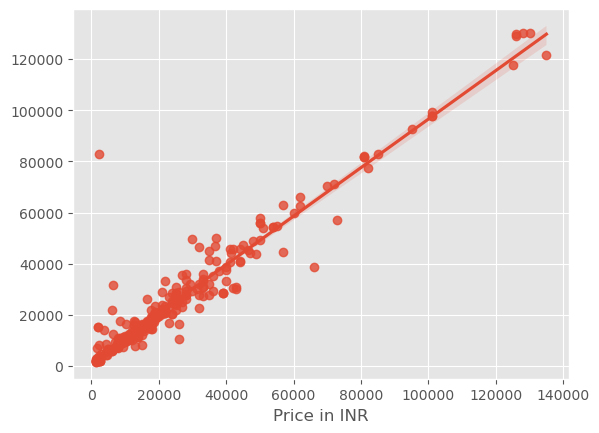

In [28]:
sns.regplot(x= ytest,y=pred3)

In [29]:
ml=MLPRegressor()
ml.fit(xtrain,ytrain)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [30]:
pred4=ml.predict(xtest)
pred4

array([30926.39155325, 18526.14345045, 17548.93929396, 20966.79110689,
       14411.3203881 , 20310.32213165, 24010.76428524, 15977.03380484,
       19384.65894404, 13156.69984462, 23669.43334705, 15499.60078561,
       23354.52610465,  9728.86855989, 25688.96589892, 14334.17449307,
       22086.68719082, 13691.36454609, 19316.29774283, 33281.84341308,
       28461.84386096, 28732.27400317,  5635.87568457, 22727.96617672,
        8323.21209712, 17223.67281812,  5881.25155476, 25722.43965514,
       28370.27629235, 17414.97449994, 13083.63601702, 13434.43943334,
       18799.33916764,  6170.26551429, 15623.52905687, 26055.9664274 ,
       20637.23352117, 25780.16611829, 14021.07508122, 22731.40508676,
        8875.47669499, 14972.79805523, 19359.48695621, 23364.47461089,
       28783.46402712, 17017.05871297, 20692.02054132, 21639.11697377,
       23584.53341539, 31746.28126598, 15738.9383702 , 24519.98929815,
       20884.53441354, 29774.75433   , 24334.24374905, 17998.7896053 ,
      

In [31]:
print("MAE",mean_absolute_error(ytest,pred4))
print("MAPE",mean_absolute_percentage_error(ytest,pred4))
print("MSE",mean_squared_error(ytest,pred4))
print("R2 SCORE",r2_score(ytest,pred4))

MAE 13539.37623191883
MAPE 1.1350478905587174
MSE 550374903.7315499
R2 SCORE -0.10841459541965381


In [32]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred4

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
556,20999,30926.391553
1386,1250,18526.143450
1450,16499,17548.939294
111,14999,20966.791107
1787,15999,14411.320388
...,...,...
790,13999,17860.379316
846,10990,9539.292035
654,13499,25731.113551
1084,36600,31555.492492


<Axes: xlabel='Price in INR'>

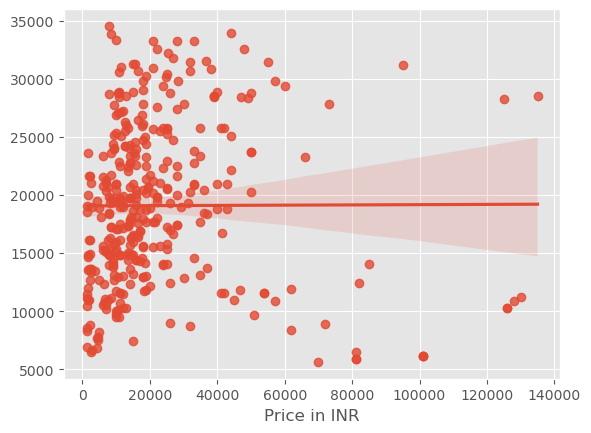

In [34]:
sns.regplot(x= ytest,y=pred4)

## the test above has shown the "RandomForestRgression" has the highest number of R2(92%) followed by "DecisionTreeRgression"
## (91%) compare to the others which perform poorly, this two moduls are thereby recommended.